# Multinomial Bayes Classification

# 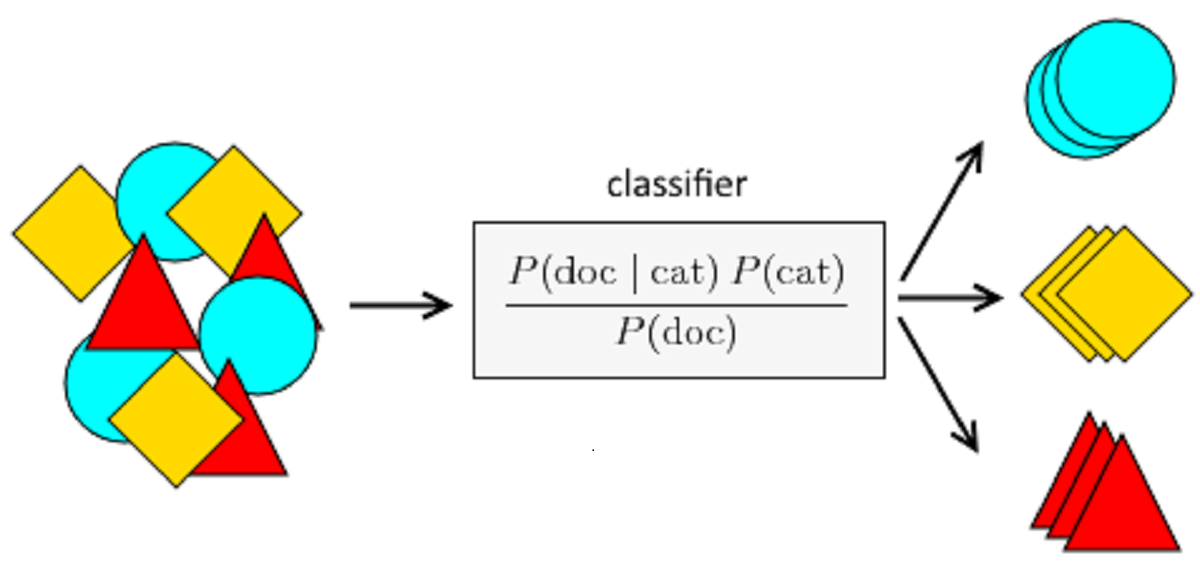

## The Multinomial Naive Bayes algorithm (not to be confused with "Bayes" as a model, which generally refers to Bayesian statistics) is a popular supervised learning algorithm used in natural language processing (NLP) and text classification tasks. Here’s a brief overview:

## Overview:

### Type: It's a probabilistic classifier based on Bayes' theorem with an assumption of independence between features.
### Use Case: Primarily used for text classification tasks where the features (typically word counts or term frequencies) are assumed to be generated by a multinomial distribution.


## Assumptions:

### Features (such as word counts) are independent of each other given the class label.
### Each feature follows a multinomial distribution.

## Key Concepts:

### Bayes' Theorem: Used to calculate the probability of a class given a feature.
### Naive Assumption: Assumes that the presence of a particular feature in a class is independent of the presence of any other feature.

## Training:

### Feature Representation: Requires feature vectors where each feature represents the frequency of a term (word) in the document.
### Parameter Estimation: Estimates probabilities from the training data using maximum likelihood estimation.

## Classification:

### Prediction: Computes the posterior probability of each class given the input features using Bayes' theorem.
### Decision Rule: Assigns the class with the highest probability as the output.

## Example Use Case: Text Classification
### Problem: Classify emails as spam or not spam.
### Features: Word frequencies (e.g., how often specific words appear in the email).
### Training: Estimate probabilities of words given each class (spam or not spam).
### Prediction: Calculate probabilities for new emails and classify based on the highest probability.
### In summary, Multinomial Naive Bayes is a robust algorithm for text classification tasks, leveraging probabilities and simple statistical assumptions to make predictions efficiently.

# TFIDF Vectorizer

## TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a technique used in information retrieval and text mining to convert textual data into numerical form, suitable for machine learning algorithms. Here's a brief description of how TF-IDF vectorization works:

### Term Frequency (TF): This component measures how frequently a term (word) appears in a document. It is calculated as the ratio of the number of times a term occurs in a document to the total number of terms in that document. The intuition behind TF is that terms that appear more frequently in a document are more important to that document.
### Inverse Document Frequency (IDF): IDF measures the importance of a term across a collection of documents (corpus). It is calculated as the logarithm of the ratio of the total number of documents to the number of documents containing the term. The IDF of a term increases with the rarity of the term across the corpus, meaning rare terms are weighted higher.

### TF-IDF Weighting: TF-IDF weighting combines TF and IDF to assign a weight to each term in each document in the corpus. It gives higher weights to terms that are frequent within a document but rare across the entire corpus.

# 

# Importing mendatory libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.pipeline import Pipeline,make_pipeline
from joblib import dump, load
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import itertools

# reading data from the news file

In [2]:
news_data = pd.read_csv('data/news.csv')

# finding length of the data 

In [3]:
dataLength = len(news_data)
print(dataLength)

422419


# Length is too much for the system to process or to train the model. So we will take some data from it for train test purpose

First we will check and remove / impute the null values.
So we can select train and test data perfectly

In [4]:
news_data.isna().sum()

ID           0
TITLE        0
URL          0
PUBLISHER    2
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

# imputing the null values with ' ' value

In [5]:
news_data['PUBLISHER'] =news_data.PUBLISHER.fillna(' ')

In [6]:
news_data.isna().sum()

ID           0
TITLE        0
URL          0
PUBLISHER    0
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

# Now we will check the different categories

In [7]:
news_data.head(2)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207


In [8]:
news_data['CATEGORY'].unique()

array(['b', 't', 'e', 'm'], dtype=object)

Here we have four different categories : 'b', 't', 'e', 'm'

Now we will select the train data on the basis of these categories such that our data will be balanced

# Imbalanced data is that data in which number of majority class is much more than the number of the minority class 

In [9]:
categories = news_data['CATEGORY'].unique()

In [10]:
news_data.head(3)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550


In [11]:
train_news_data = pd.DataFrame()
for category in categories:
    train_news_data = pd.concat([train_news_data,news_data[news_data['CATEGORY'] == category][0:12000]])
    

In [12]:
train_news_data.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


# creating test data 

In [14]:
test_data = news_data.sample(1000)

# saving train_test data file

In [15]:
train_news_data.to_csv('data/train_news_data.csv')
test_data.to_csv('data/test_data.csv')

# Now we can use our train data 

In [16]:
train_news_data = pd.read_csv('data/train_news_data.csv')

In [17]:
train_news_data.head()

,Unnamed: 0,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


# Now we will drop the columns which is not much more needed

Here we can see in our data hostname is already present in the url so we can use either url or hostname,
Time stamp is not needed, we can drop ID too

In [18]:
train_news_data = train_news_data.drop(['Unnamed: 0','ID','URL','TIMESTAMP'], axis=1)

In [19]:
train_news_data.head()

,TITLE,PUBLISHER,CATEGORY,STORY,HOSTNAME
0,"Fed official says weak data caused by weather,...",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com
1,Fed's Charles Plosser sees high bar for change...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com
2,US open: Stocks fall after Fed official hints ...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com
3,"Fed risks falling 'behind the curve', Charles ...",IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com


# Now we can consider TITLE, PUBLISHER, STORY, HOSTNAME under a single text

In [20]:
train_news_data['singleText'] = train_news_data['TITLE']+' '+train_news_data['PUBLISHER']+' '+train_news_data['STORY']+' '+train_news_data['HOSTNAME']

In [21]:
train_news_data.head()

,TITLE,PUBLISHER,CATEGORY,STORY,HOSTNAME,singleText
0,"Fed official says weak data caused by weather,...",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,"Fed official says weak data caused by weather,..."
1,Fed's Charles Plosser sees high bar for change...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,Fed's Charles Plosser sees high bar for change...
2,US open: Stocks fall after Fed official hints ...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,US open: Stocks fall after Fed official hints ...
3,"Fed risks falling 'behind the curve', Charles ...",IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,"Fed risks falling 'behind the curve', Charles ..."
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,Fed's Plosser: Nasty Weather Has Curbed Job Gr...


# Creating lemmitization object theat we will use to convert the words to its root words.

In [22]:
lemit = WordNetLemmatizer()

# Now we will do text data preprocessing

In [23]:
import nltk

stopWords = stopwords.words('english')
for index,row in train_news_data.iterrows():
    filtered_sentence = ''
    singleLine = row['singleText']
    singleLine = re.sub(r'[^\w\s]','',singleLine)
    words = nltk.word_tokenize(singleLine)
    words = [w for w in words if not w in stopWords]
    for word in words:
        filtered_sentence = filtered_sentence +' '+ str(lemit.lemmatize(word)).lower()
    train_news_data.loc[index,'singleText'] = filtered_sentence
    

In [24]:
train_news_data.head()

,TITLE,PUBLISHER,CATEGORY,STORY,HOSTNAME,singleText
0,"Fed official says weak data caused by weather,...",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,fed official say weak data caused weather slo...
1,Fed's Charles Plosser sees high bar for change...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,feds charles plosser see high bar change pace...
2,US open: Stocks fall after Fed official hints ...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,us open stocks fall fed official hint acceler...
3,"Fed risks falling 'behind the curve', Charles ...",IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,fed risk falling behind curve charles plosser...
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,feds plosser nasty weather has curbed job gro...


# Now our data has been preprocessed and has been stored in column single text. Now we will drop off extra columns and convert the categorical values to numerical values.

In [25]:
train_news_data = train_news_data.drop(['TITLE','PUBLISHER','STORY','HOSTNAME'], axis = 1)

In [26]:
train_news_data.head()

,CATEGORY,singleText
0,b,fed official say weak data caused weather slo...
1,b,feds charles plosser see high bar change pace...
2,b,us open stocks fall fed official hint acceler...
3,b,fed risk falling behind curve charles plosser...
4,b,feds plosser nasty weather has curbed job gro...


In [27]:
X_data = train_news_data['singleText']
Y_data = train_news_data['CATEGORY']

# Now here we will apply NLP to make BAG OF WORDS

In [29]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_data)
freq_term_matrix = count_vectorizer.transform(X_data)

tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

# defining function to plot result using confusion_matrix

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Now we will make our model.

# I am using MultinomialNB model as we have multiclasses to predict

In [61]:
naive_classifier = MultinomialNB()
naive_classifier.fit(tf_idf_matrix,Y_data)
# pred = naive_classifier.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(naive_classifier.score(tf_idf_matrix,Y_data)))

Accuracy of NB  classifier on training set: 0.99


# Now I have tested the model mannualy against the test data that I had prepared previously 

In [32]:
test_news_data = pd.read_csv('data/test_data.csv')

In [33]:
test_news_data['singleText'] = test_news_data['TITLE']+' '+test_news_data['PUBLISHER']+' '+test_news_data['STORY']+' '+test_news_data['HOSTNAME']
import nltk

stopWords = stopwords.words('english')
for index,row in test_news_data.iterrows():
    filtered_sentence = ''
    singleLine = row['singleText']
    singleLine = re.sub(r'[^\w\s]','',singleLine)
    words = nltk.word_tokenize(singleLine)
    words = [w for w in words if not w in stopWords]
    for word in words:
        filtered_sentence = filtered_sentence +' '+ str(lemit.lemmatize(word)).lower()
    test_news_data.loc[index,'singleText'] = filtered_sentence

x_data = test_news_data['singleText']
y_data = test_news_data['CATEGORY']

In [34]:
freq_term_matrix_test = count_vectorizer.transform(x_data)
tf_idf_matrix_test = tfidf.fit_transform(freq_term_matrix_test)

Confusion matrix, without normalization


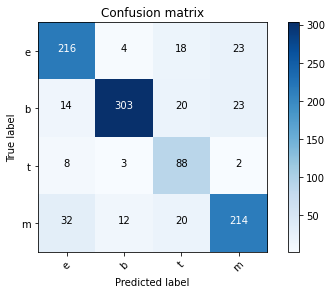

In [43]:
c_matrix = confusion_matrix(y_data,naive_classifier.predict(tf_idf_matrix_test))
plot_confusion_matrix(c_matrix, y_data.unique())

In [35]:
print(classification_report(y_data, naive_classifier.predict(tf_idf_matrix_test)))

              precision    recall  f1-score   support

           b       0.80      0.83      0.81       261
           e       0.94      0.84      0.89       360
           m       0.60      0.87      0.71       101
           t       0.82      0.77      0.79       278

    accuracy                           0.82      1000
   macro avg       0.79      0.83      0.80      1000
weighted avg       0.84      0.82      0.82      1000



In [73]:
print('Accuracy of NB  classifier on test set: {:.2f}'
     .format(naive_classifier.score(tf_idf_matrix_test,y_data)))

Accuracy of NB  classifier on test set: 0.82


# Now we will create the pipeline and then train against the train data.

In [62]:
classifier_pipeline = model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', MultinomialNB()),
])

In [63]:
classifier_pipeline

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [65]:
classifier_pipeline.fit(X_data,Y_data)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [66]:
teststring = test_news_data.loc[1,'TITLE'] + ' ' + test_news_data.loc[1,'PUBLISHER']+' '+test_news_data.loc[1,'STORY'] + ' ' + test_news_data.loc[1,'HOSTNAME']

In [67]:
testData = pd.Series(teststring)

In [68]:
classifier_pipeline.predict(testData)

array(['b'], dtype='<U1')

# here we can see that pipeline is predicting correct answer

# Now we will save this pipeline so we can use it further

In [69]:
filename = 'classifier_pipeline.sav'
dump(classifier_pipeline, filename)

['classifier_pipeline.sav']

In [70]:
PL = load(filename)

In [71]:
testing_data =pd.Series(test_news_data.loc[3,'TITLE'] + ' ' + test_news_data.loc[3,'PUBLISHER']+' '+test_news_data.loc[3,'STORY'] + ' ' + test_news_data.loc[3,'HOSTNAME'])

In [72]:
PL.predict(testData)

array(['b'], dtype='<U1')